In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

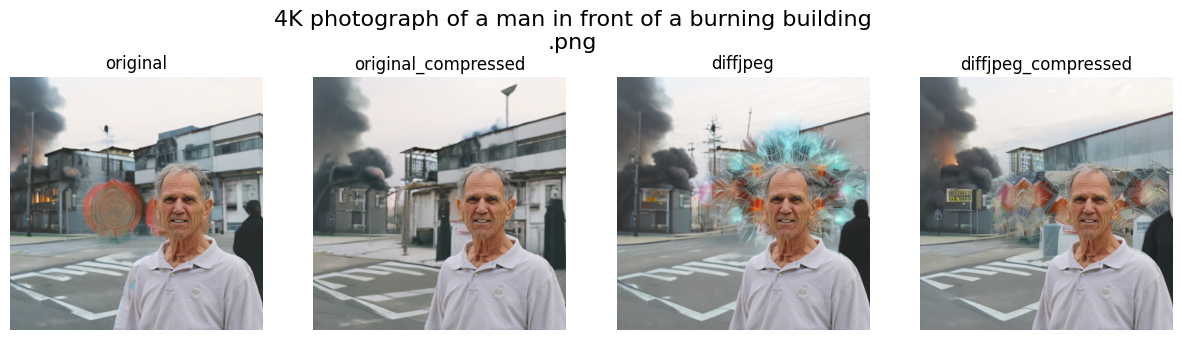

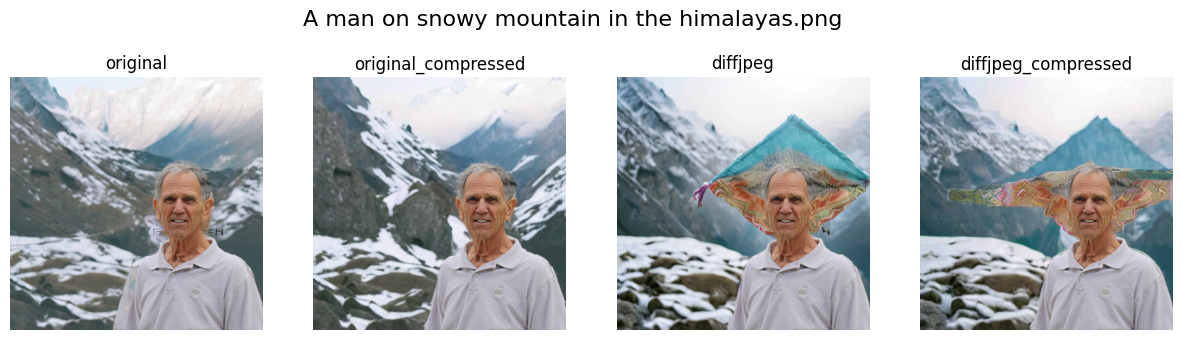

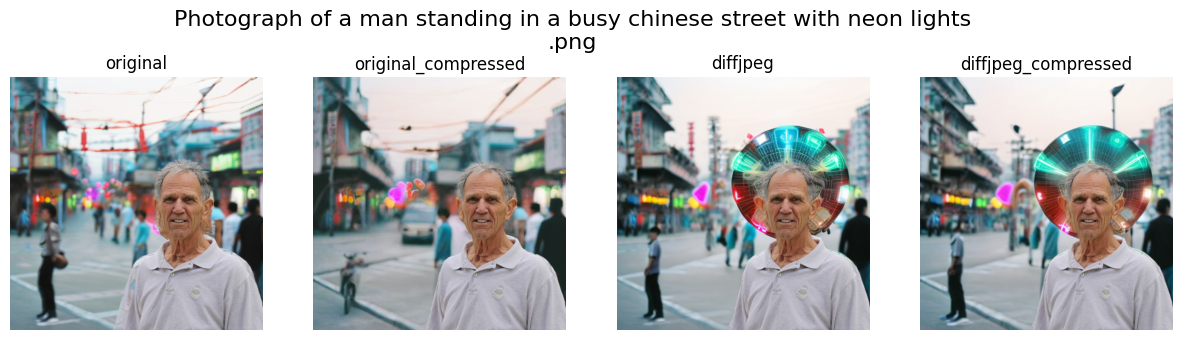

In [11]:
main_folder = "011"
subfolders = ["original", "original_compressed", "diffjpeg", "diffjpeg_compressed"]  # Update with actual names

# Get a list of all images in each subfolder
image_dict = {}
for sub in subfolders:
    sub_path = os.path.join(main_folder, sub)
    if os.path.exists(sub_path):
        for file in os.listdir(sub_path):
            if "result" not in file.lower() and file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_dict.setdefault(file, []).append(os.path.join(sub_path, file))

comparison_folder = os.path.join(main_folder, "comparisons")
os.makedirs(comparison_folder, exist_ok=True)
# Filter only images that exist in all subfolders
valid_images = {k: v for k, v in image_dict.items() if len(v) == len(subfolders)}
# Display the images side by side
for img_name, img_paths in valid_images.items():
    fig, axes = plt.subplots(1, len(subfolders), figsize=(15, 4))
    fig.suptitle(img_name, fontsize=16)
    
    for idx, (ax, img_path) in enumerate(zip(axes, img_paths)):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"{subfolders[idx]}")
        ax.axis("off")
    
    plt.savefig(f"{comparison_folder}/{img_name}")